<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Assignment Questions </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement



### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [623]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

from sklearn import preprocessing
'exec(% matplotlib inline)'

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first ten observations.

In [624]:
# load the csv file
# store the data in 'df_heart'
df_heart = pd.read_csv('Heart_disease.csv')

# display first five observations using head()
df_heart.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
5,0,43,2.000000,0,0.000000,0.000000,0,1,0,228.000000,180.000000,110.000000,30.300000,77.000000,99.000000,0
6,0,63,1.000000,0,0.000000,0.000000,0,0,0,205.000000,138.000000,71.000000,33.110000,60.000000,85.000000,1
7,0,45,2.000000,1,20.000000,0.000000,0,0,0,313.000000,100.000000,71.000000,21.680000,79.000000,78.000000,0
8,1,52,1.000000,0,0.000000,0.000000,0,1,0,260.000000,141.500000,89.000000,26.360000,76.000000,79.000000,0
9,1,43,1.000000,1,30.000000,0.000000,0,1,0,225.000000,162.000000,107.000000,23.610000,93.000000,88.000000,0


**Let us now see the number of variables and observations in the data.**

In [625]:
# use 'shape' to check the dimension of data
df_heart.shape

(4240, 16)

In [626]:
# use 'keys' to check the keys of data
df_heart.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD'],
      dtype='object')

In [627]:
# use 'info' to check the information of data
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
CVD                4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [628]:
# use 'describe' to check the describe of data
df_heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<a id="dtype"></a>
## 2.2 Check the Data Type


**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [629]:
# use 'dtypes' to check the data type of a variable
df_heart.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

#### Change the data type as per the data definition.

In [630]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of below columns
df_heart['BPMeds'] = df_heart['BPMeds'].astype(object)
df_heart['male'] = df_heart['male'].astype(object)
df_heart['currentSmoker'] = df_heart['currentSmoker'].astype(object)
df_heart['prevalentStroke'] = df_heart['prevalentStroke'].astype(object)
df_heart['prevalentHyp'] = df_heart['prevalentHyp'].astype(object)
df_heart['diabetes'] = df_heart['diabetes'].astype(object)


#### Recheck the data type after the conversion. 

In [631]:
df_heart.dtypes

male                object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

<a id="drop"></a>
## 2.3 Remove Insignificant Variables, if exists.

In [632]:
df_heart.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0


In [633]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_heart=df_heart.drop('education', axis = 1)

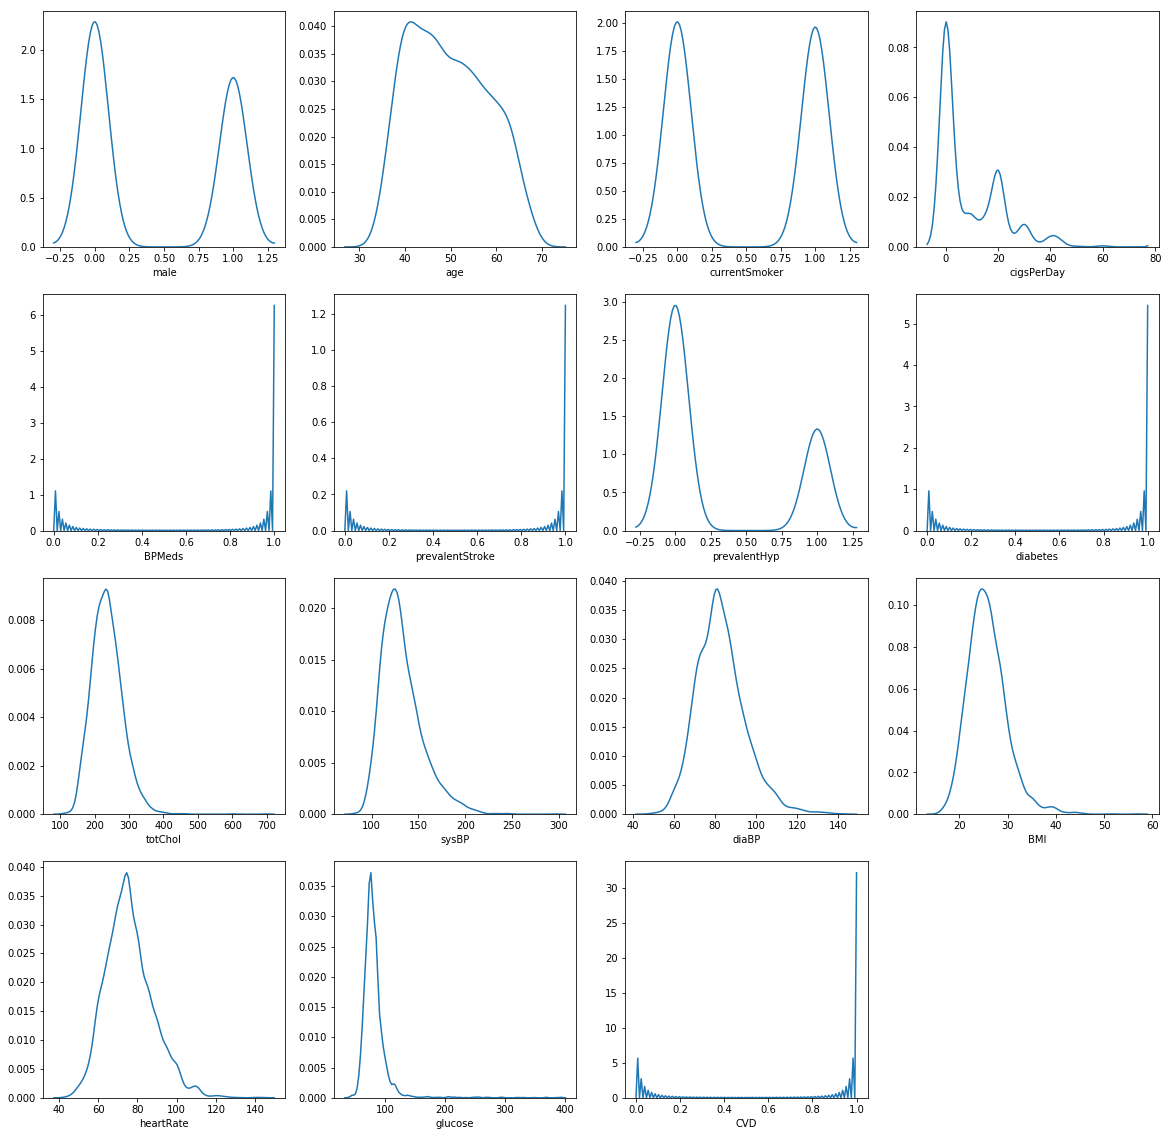

In [634]:
l=['male', 'age','currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD']
plt.figure(figsize=(20,20))
for i in range(1,16):
    plt.subplot(4,4,i)
    sns.distplot(df_heart[l[i-1]],hist=False)

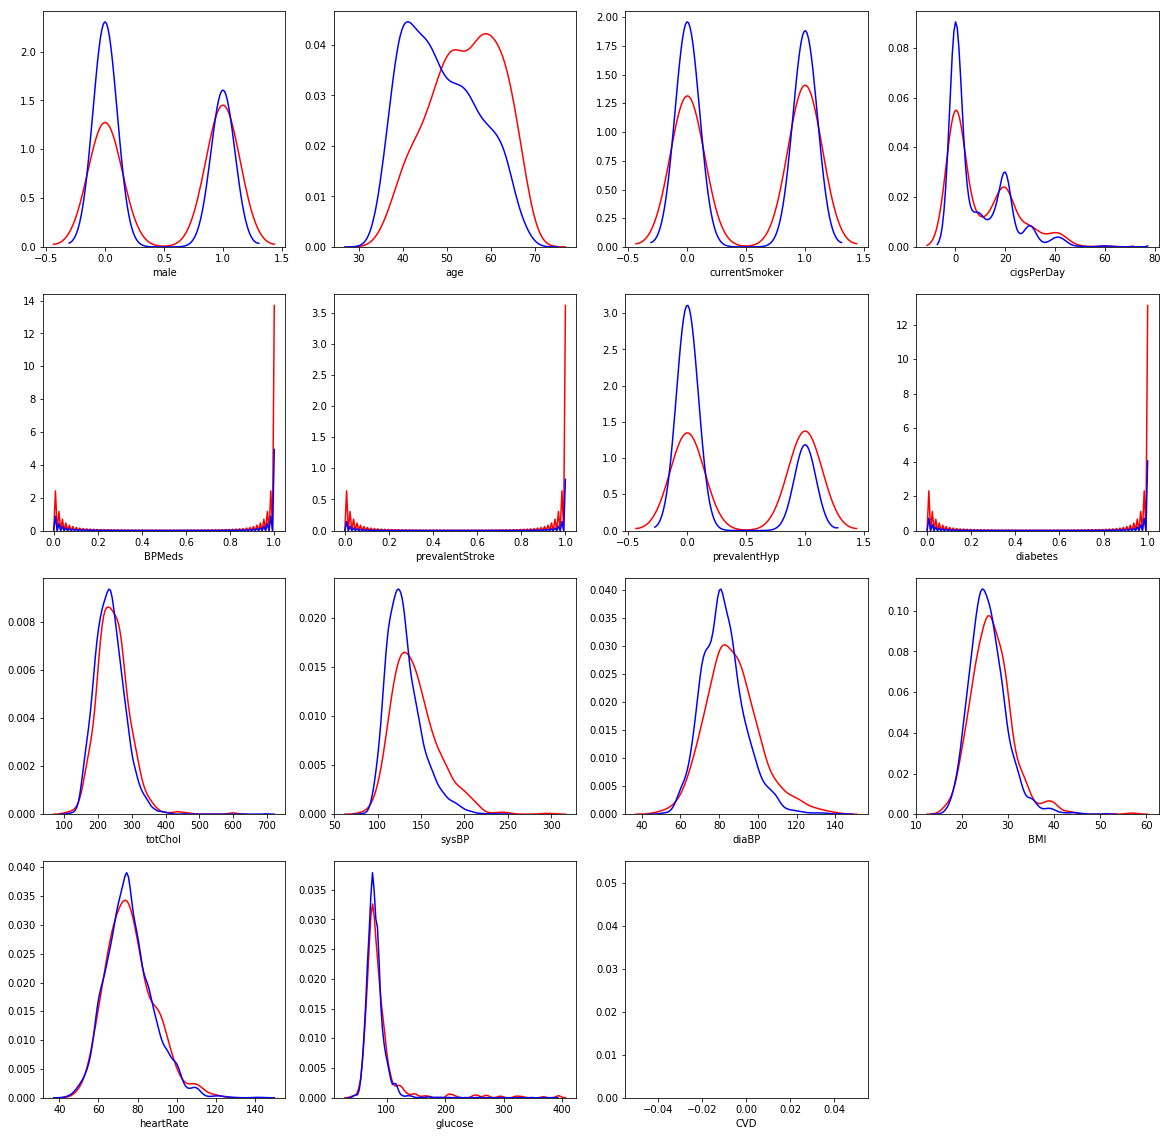

In [635]:
l=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD']
plt.figure(figsize=(20,20))
for i in range(1,16):
    plt.subplot(4,4,i)
    sns.distplot(df_heart[df_heart['CVD']==1][l[i-1]],hist=False,color='red')
    sns.distplot(df_heart[df_heart['CVD']==0][l[i-1]],hist=False,color='blue')

We can see that diabetes,BPMeds and prevalent stroke column have 2 class 0 and 1 and is highly imbalance that one type of class is looking like outlier same with target column

**Distribution of numeric independent variables.**

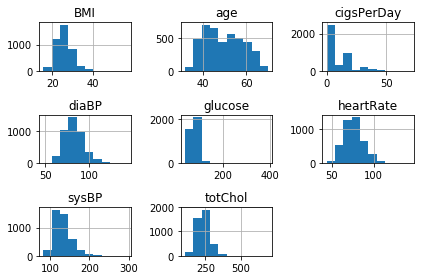

Skewness:


male               0.285997
age                0.228867
currentSmoker      0.023595
cigsPerDay         1.247052
BPMeds             5.551462
prevalentStroke   12.912160
prevalentHyp       0.818827
diabetes           5.995907
totChol            0.871881
sysBP              1.145285
diaBP              0.713250
BMI                0.982183
heartRate          0.644372
glucose            6.214948
dtype: float64

In [636]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_heart.drop('CVD', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_heart.drop('CVD', axis = 1).skew()

**Distribution of categoric independent variable.**

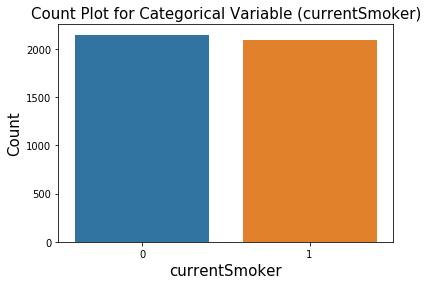

In [637]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_heart.currentSmoker)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (currentSmoker)', fontsize = 15)
plt.xlabel('currentSmoker', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

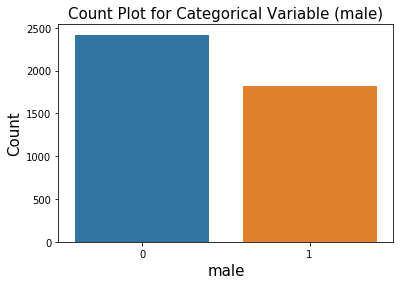

In [638]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_heart.male)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (male)', fontsize = 15)
plt.xlabel('male', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

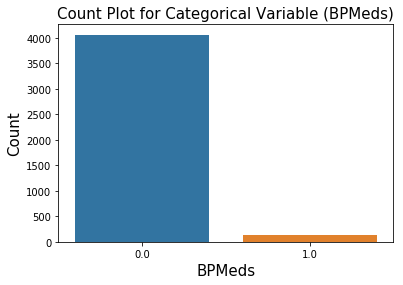

In [639]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_heart.BPMeds)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (BPMeds)', fontsize = 15)
plt.xlabel('BPMeds', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

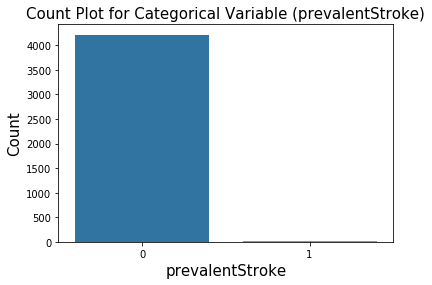

In [640]:
#prevalentStroke
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_heart.prevalentStroke)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (prevalentStroke)', fontsize = 15)
plt.xlabel('prevalentStroke', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

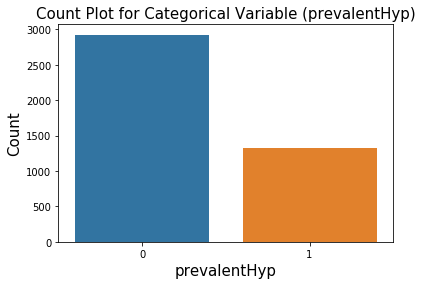

In [641]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_heart.prevalentHyp)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (prevalentHyp)', fontsize = 15)
plt.xlabel('prevalentHyp', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

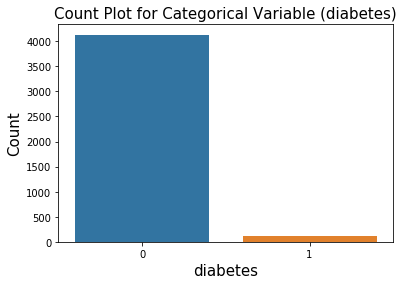

In [642]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_heart.diabetes)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (diabetes)', fontsize = 15)
plt.xlabel('diabetes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

#### Distribution of dependent variable.

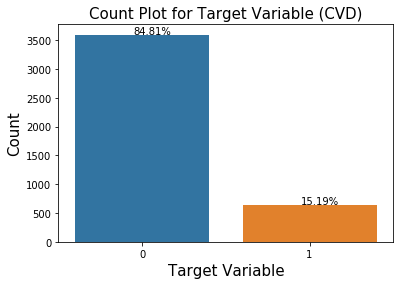

In [643]:
# consider only the target variable
df_target = df_heart['CVD'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (CVD)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<a id="null"></a>
## 2.5 Missing Value Treatment

Check for the presence of missing values and their percentage for each column. If applicable, choose the right approach to treat them.

Is it a good approach to drop the records/columns with missing values? Why or why not?

In [644]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_heart.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_heart.isnull().sum()*100/df_heart.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585
CVD,0,0.000000
diaBP,0,0.000000
sysBP,0,0.000000
diabetes,0,0.000000


In [645]:
df_heart.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [646]:
count=0
for i in df_heart.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df_heart.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [647]:
df_heart.isnull().sum()[df_heart.isnull().sum()>0]

cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [648]:
# removing NaN / NULL values
df_heart.dropna(axis = 0, inplace = True)
print(df_heart.head(), df_heart.shape)
print(df_heart.CVD.value_counts())

  male  age currentSmoker  cigsPerDay   BPMeds prevalentStroke prevalentHyp  \
0    1   39             0    0.000000 0.000000               0            0   
1    0   46             0    0.000000 0.000000               0            0   
2    1   48             1   20.000000 0.000000               0            0   
3    0   61             1   30.000000 0.000000               0            1   
4    0   46             1   23.000000 0.000000               0            0   

  diabetes    totChol      sysBP     diaBP       BMI  heartRate    glucose  \
0        0 195.000000 106.000000 70.000000 26.970000  80.000000  77.000000   
1        0 250.000000 121.000000 81.000000 28.730000  95.000000  76.000000   
2        0 245.000000 127.500000 80.000000 25.340000  75.000000  70.000000   
3        0 225.000000 150.000000 95.000000 28.580000  65.000000 103.000000   
4        0 285.000000 130.000000 84.000000 23.100000  85.000000  85.000000   

   CVD  
0    0  
1    0  
2    0  
3    1  
4    0   (3

In [649]:
df_heart.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD'],
      dtype='object')

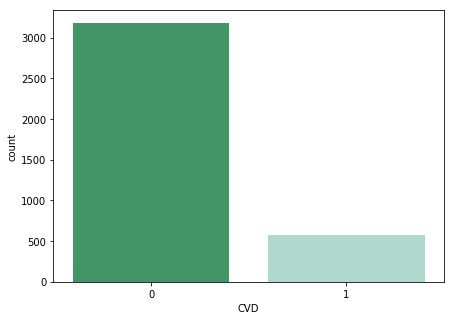

In [650]:
# counting no. of patients affected with CHD
plt.figure(figsize = (7, 5))
sns.countplot(x ='CVD', data = df_heart,
             palette ="BuGn_r" )
plt.show()

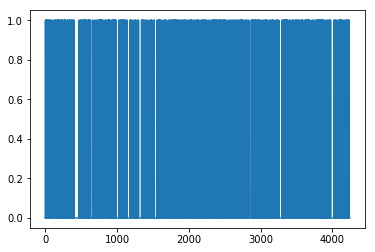

In [651]:
laste = df_heart['CVD'].plot()
plt.show(laste)

In [652]:
df_heart[['cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose',
      'cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']].cov()

,cigsPerDay,totChol,BMI,heartRate,glucose,cigsPerDay,totChol,BMI,heartRate,glucose
cigsPerDay,142.207927,-16.279119,-4.388908,9.580659,-15.689643,142.207927,-16.279119,-4.388908,9.580659,-15.689643
totChol,-16.279119,1990.194284,21.701375,50.563227,49.970562,-16.279119,1990.194284,21.701375,50.563227,49.970562
BMI,-4.388908,21.701375,16.529093,3.484747,8.557331,-4.388908,21.701375,16.529093,3.484747,8.557331
heartRate,9.580659,50.563227,3.484747,142.955074,28.433023,9.580659,50.563227,3.484747,142.955074,28.433023
glucose,-15.689643,49.970562,8.557331,28.433023,570.361071,-15.689643,49.970562,8.557331,28.433023,570.361071
cigsPerDay,142.207927,-16.279119,-4.388908,9.580659,-15.689643,142.207927,-16.279119,-4.388908,9.580659,-15.689643
totChol,-16.279119,1990.194284,21.701375,50.563227,49.970562,-16.279119,1990.194284,21.701375,50.563227,49.970562
BMI,-4.388908,21.701375,16.529093,3.484747,8.557331,-4.388908,21.701375,16.529093,3.484747,8.557331
heartRate,9.580659,50.563227,3.484747,142.955074,28.433023,9.580659,50.563227,3.484747,142.955074,28.433023
glucose,-15.689643,49.970562,8.557331,28.433023,570.361071,-15.689643,49.970562,8.557331,28.433023,570.361071


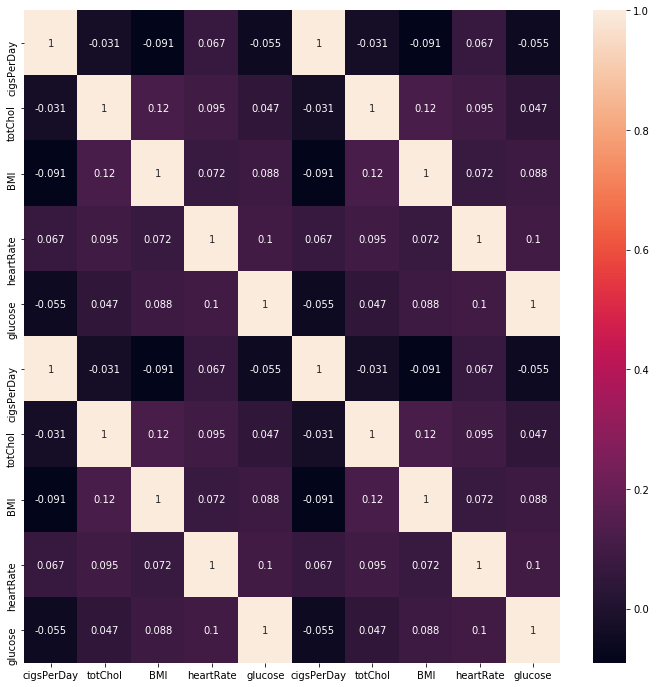

In [653]:
plt.figure(figsize=(12,12))
sns.heatmap(df_heart[['cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose',
      'cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']].corr(),annot=True)
    

In [654]:
df_heart.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
5,0,43,0,0.000000,0.000000,0,1,0,228.000000,180.000000,110.000000,30.300000,77.000000,99.000000,0
6,0,63,0,0.000000,0.000000,0,0,0,205.000000,138.000000,71.000000,33.110000,60.000000,85.000000,1
7,0,45,1,20.000000,0.000000,0,0,0,313.000000,100.000000,71.000000,21.680000,79.000000,78.000000,0
8,1,52,0,0.000000,0.000000,0,1,0,260.000000,141.500000,89.000000,26.360000,76.000000,79.000000,0
9,1,43,1,30.000000,0.000000,0,1,0,225.000000,162.000000,107.000000,23.610000,93.000000,88.000000,0


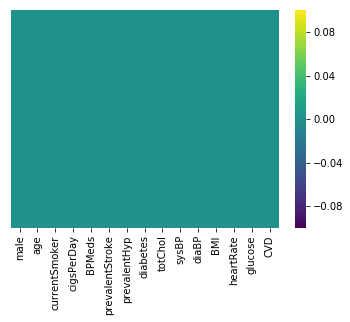

In [655]:
sns.heatmap(df_heart.isnull(), yticklabels=False, cmap="viridis")

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [656]:
# store the target variable 'CVD' in a dataframe 'df_target'
df_target = df_heart['CVD']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'CVD' using drop()
# 'axis = 1' drops the specified column
df_feature = df_heart.drop('CVD', axis = 1)


In [657]:
df_target.head(5)

0    0
1    0
2    0
3    1
4    0
Name: CVD, dtype: int64

In [658]:
df_feature.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000
1,0,46,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000
2,1,48,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000
3,0,61,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000
4,0,46,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000


#### Filter numerical and categorical variables.

In [659]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [660]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes'],
      dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [661]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="split"></a>
## 2.7 Train-Test Split

Before applying various classification techniques to predict the patient having cardiovascular disease or not, let us split the dataset in train and test set.

In [662]:
X = np.asarray(df_heart[['age', 'male', 'cigsPerDay','totChol', 'sysBP', 'glucose']])
y = np.asarray(df_heart['CVD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)



Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


In [663]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary2())
#result.summary2()

Optimization terminated successfully.
         Current function value: 0.666279
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: y                Pseudo R-squared: -0.568   
Date:               2022-09-18 08:54 AIC:              3509.9659
No. Observations:   2625             BIC:              3545.2029
Df Model:           5                Log-Likelihood:   -1749.0  
Df Residuals:       2619             LL-Null:          -1115.2  
Converged:          1.0000           Scale:            1.0000   
-------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1      0.2824      0.0457    6.1755    0.0000     0.1928    0.3721
x2      0.1473      0.0423    3.4804    0.0005     0.0643    0.2302
x3      0.1644      0.0439    3.7417    0.0002     0.0783    0.

<a id="scale"></a>
## 2.8 Scale the Data 

Why should we scale the variables?

In [664]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [665]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,-1.233910,-0.755527,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.417017,-0.755527,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.183620,0.921832,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,1.333466,1.760511,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
4,-0.417017,1.173436,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [666]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()
print(logreg)
# print the summary of the model
print(logreg.summary2())
#result.summary2()



Optimization terminated successfully.
         Current function value: 0.666279
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: y                Pseudo R-squared: -0.568   
Date:               2022-09-18 08:54 AIC:              3509.9659
No. Observations:   2625             BIC:              3545.2029
Df Model:           5                Log-Likelihood:   -1749.0  
Df Residuals:       2619             LL-Null:          -1115.2  
Converged:          1.0000           Scale:            1.0000   
-------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1      0.2824      0.0457    6.1755    0.0000     0.1928    0.3721
x2      0.1473      0.0423    3.4804    0.0005     0.0643    0.2302
x3      0.1644      0.0439    3.7417    0.0002     0.0783    0.

In [667]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg)
 
# Evaluation and accuracy
from sklearn.metrics import jaccard_similarity_score
print('')
print('Accuracy of the model in jaccard similarity score is = ',
      jaccard_similarity_score(y_test, y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy of the model in jaccard similarity score is =  0.8490230905861457


In [668]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary2())
#result.summary2()

Optimization terminated successfully.
         Current function value: 0.666279
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: y                Pseudo R-squared: -0.568   
Date:               2022-09-18 08:54 AIC:              3509.9659
No. Observations:   2625             BIC:              3545.2029
Df Model:           5                Log-Likelihood:   -1749.0  
Df Residuals:       2619             LL-Null:          -1115.2  
Converged:          1.0000           Scale:            1.0000   
-------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1      0.2824      0.0457    6.1755    0.0000     0.1928    0.3721
x2      0.1473      0.0423    3.4804    0.0005     0.0643    0.2302
x3      0.1644      0.0439    3.7417    0.0002     0.0783    0.

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is the value of `McFadden's R-squared`. This value can be obtained from the formula:

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

Where,<br>
Log-Likelihood: It is the maximum value of the log-likelihood function<br>
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept 

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of `pseudo R-squared` such as `Cox & Snell R-squared`, `Nagelkerke R-squared` and so on.

**Cox & Snell R-squared:** The convergence of the logistic model can be determined by the R-squared value. It is given by the formula:

<p style='text-indent:25em'> <strong> Cox & Snell R-squared = $ 1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N} $</strong> </p>

Where,<br> 
L(M): The conditional probability of target variable given the independent variables<br>
N: Total number of observations

**Note:** The maximum of Cox & Snell R-squared is always less than 1. It is equal to $(1 - (L(M_{Intercept})^{2/N})$



**Nagelkerke R-squared:** It is defined as the ratio of Cox & Snell R-squared to the maximum of Cox & Snell R-squared. The formula is given as:

<p style='text-indent:25em'> <strong>Nagelkerke  R-squared = $ \frac{1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N}}{1 -  (L(M_{Intercept})^{2/N}} $</strong> </p>



Thus, Nagelkerke R-squared can be equal to 1, if $L(M_{Full}) = 1$



**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [669]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 3509.9658729101143


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [670]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
0,1.326335
1,1.158666
2,1.178713
3,1.035842
4,1.185949
5,1.205203


**Interpretation:** 

odds_const: The odds of getting a heart disease is 0.107571, considering all other variables take zero value 

odds_age = 1.326335, it implies that the odds of getting a heart disease increases by a factor of 1.326335 due to one unit increase in the age, keeping other variables constant

odds_male = 1.158666, it implies that the odds of getting a heart disease increases by a factor of 1.158666 due to one unit increase in the male, keeping other variables constant

odds_cigsPerDay = 1.178713, it implies that the odds of getting a heart disease increases by a factor of 11.178713 due to one unit increase in the cigarets per Day , keeping other variables constant

odds_totChol_mode = 1.035842, it implies that the odds of getting a heart disease increases by a factor of 1.035842 due to one unit increase in the total cholestrol, keeping other variables constant

odds_sysBP = 1.185949, it implies that the odds of getting  a heart disease by a factor of 1.185949 due to one unit increase in the sysBP strength, keeping other variables constant


odds_glucose_ran = 1.205203, it implies that the odds of getting a heart disease increases by a factor of 1.205203 due to one unit increase in the glucose, keeping other variables constant



**Do predictions on the test set.**

In [671]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
#y_pred_prob.head()

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.7. i.e. if 'y_pred_prob' is less than 0.7, then consider it to be 0 else consider it to be 1.

In [672]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.7 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

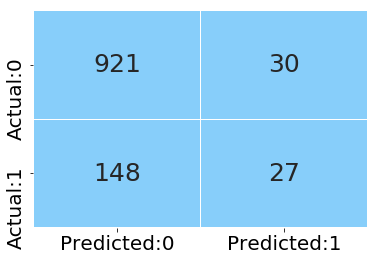

In [673]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

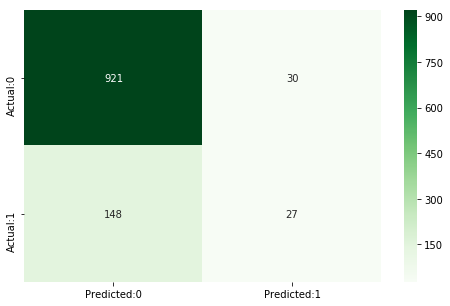

The details for confusion matrix is =
             precision    recall  f1-score   support

          0       0.86      0.97      0.91       951
          1       0.47      0.15      0.23       175

avg / total       0.80      0.84      0.81      1126



In [674]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
						columns = ['Predicted:0', 'Predicted:1'],
						index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))





In [675]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [676]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.47368421052631576

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [677]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.15428571428571428

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [678]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.9684542586750788

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [679]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.23275862068965517

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [680]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8419182948490231

**Interpretation:**  For our dataset,  accuracy is 0.84. We can say that our model is 84% accurate.

We can also calculate the above measures using the `classification_report()`

In [681]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

             precision    recall  f1-score   support

          0       0.86      0.97      0.91       951
          1       0.47      0.15      0.23       175

avg / total       0.80      0.84      0.81      1126



**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [682]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.16932054608300673


**Interpretation:** Write the inference based on the kappa score value and this model falls under which agreeemnet.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

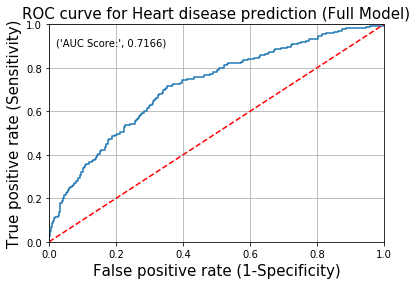

In [683]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Heart disease prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** Provide inference based on the obtained ROC curve and AUC score.

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.7166.

<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

In [684]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [685]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [686]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.5,0.155417,1,0.155417,0,0.269024
1,0.2,0.5,0.155417,1,0.155417,0,0.269024
2,0.3,0.51607,0.15978,0.994286,0.186501,0.0102657,0.275316
3,0.4,0.584903,0.184332,0.914286,0.357904,0.0649194,0.306807
4,0.5,0.657603,0.239209,0.76,0.587034,0.166929,0.363885
5,0.6,0.631513,0.327434,0.422857,0.775311,0.235075,0.369077
6,0.7,0.56137,0.473684,0.154286,0.841918,0.169321,0.232759
7,0.8,0.523085,0.642857,0.0514286,0.848135,0.0739152,0.0952381
8,0.9,0.505714,1,0.0114286,0.846359,0.0191539,0.0225989


<a id="youden"></a>
### 3.1.1 Youden's Index

In [687]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,FPR,TPR,Threshold,Difference
0,0.353312,0.714286,0.528107,0.360973
1,0.349106,0.708571,0.530317,0.359465
2,0.344900,0.702857,0.531513,0.357957
3,0.340694,0.697143,0.533621,0.356449
4,0.353312,0.708571,0.528565,0.355259


In [688]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.4 else 1 for x in y_pred_prob]


#### Plot the confusion matrix, with the optimal threshold computed using Youden's index method.

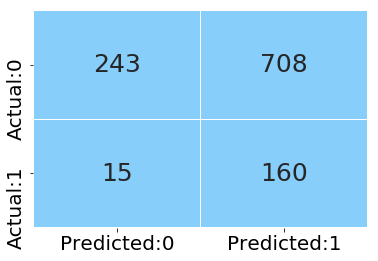

In [689]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [690]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

             precision    recall  f1-score   support

          0       0.94      0.26      0.40       951
          1       0.18      0.91      0.31       175

avg / total       0.82      0.36      0.39      1126



In [691]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.06491940207990177


**Compute various performance metrics using classification report.**

In [692]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

             precision    recall  f1-score   support

          0       0.94      0.26      0.40       951
          1       0.18      0.91      0.31       175

avg / total       0.82      0.36      0.39      1126



In [693]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.06491940207990177
